In [1]:
import sys
sys.path.insert(1, '../Calendar/')

import functools
import multiprocessing
from math import floor
from typing import List, Tuple

import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

from PhenomenaDetection import Detection, Phenomenom, Result
from Calculation import Calculation
from pymeeus.Epoch import Epoch
from pymeeus.JupiterMoons import JupiterMoons

# 1 second in jd = 1.157401129603386e-05
s_jd = 1.157401129603386e-05

In [2]:
epoch_start = Epoch()
epoch_start.set(2020, 1, 1, 0)

epoch_stop = Epoch()
epoch_stop.set(2020, 2, 1, 0)

calc_time_step = 60 * 120 * 1.157401129603386e-05

calc = Calculation(epoch_start, epoch_stop, calc_time_step, 0)

for tmng in calc.all_timings_sorted:
    print(tmng.epoch.get_full_date(), tmng.row, tmng.phenomenom.phenomenom_type, tmng.appereance_type,
          tmng.phenomenom.shadow_type)

Coordinate Calculation finished for:  2458865.083248809  -  2458868.91656135
Coordinate Calculation finished for:  2458853.4166454226  -  2458857.333290845
Coordinate Calculation finished for:  Coordinate Calculation finished for: 2458857.333290845   - 2458861.1666033864   - 2458861.1666033864
 2458865.083248809
Coordinate Calculation finished for:  2458872.833206773  -  2458876.666519314
Coordinate Calculation finished for:  2458868.91656135  -  2458872.833206773
Coordinate Calculation finished for:  2458876.666519314  -  2458880.5831647366
Coordinate Calculation finished for:  2458849.5  -  2458853.4166454226
Got rough timings
Exact timings for Satellite  4 Exact timings for Satellite , phenomenom:  4  0, phenomenom:    calculated1 
 calculated
Exact timings for Satellite  4 , phenomenom: Exact timings for Satellite  3  4 calculated 
, phenomenom:  2  calculated
Exact timings for Satellite  3 , phenomenom:  3  calculated
Exact timings for Satellite  3 , phenomenom:  2  calculated
Exa

In [3]:
eclipse_signal = np.zeros([1 , 60*60*24*31])

base_epoch = Epoch()
base_epoch.set(2020, 1, 1, 0)

print(np.shape(eclipse_signal))

for tmng in calc.all_timings_sorted:


    if((tmng.row == 0) & (tmng.phenomenom.phenomenom_type == 'EC') & (tmng.appereance_type == 'start') \
       & (tmng.phenomenom.shadow_type == 'EXT')):

        #print(tmng.epoch.get_full_date(), tmng.row, tmng.phenomenom.phenomenom_type, tmng.appereance_type,
              #tmng.phenomenom.shadow_type)
        
        time_bin = np.round((tmng.epoch.jde()-base_epoch.jde()) * 1/s_jd)
        
        #print(time_bin.astype(int))
        
        eclipse_signal[0,time_bin.astype(int)] = 1
        
        
for i in range(0,60*60*24*31):

    if(eclipse_signal[0,i] != 0):
        print("Value at : " + str(i*s_jd) + " : " + str(eclipse_signal[0,i]))        
               

(1, 2678400)
Value at : 1.5264037577435374 : 1.0
Value at : 3.296289991121739 : 1.0
Value at : 5.066129928454757 : 1.0
Value at : 6.8360277358442545 : 1.0
Value at : 8.60584452515468 : 1.0
Value at : 10.37570761051029 : 1.0
Value at : 12.145535973832011 : 1.0
Value at : 13.915410633198917 : 1.0
Value at : 15.68520427448675 : 1.0
Value at : 17.455055785831064 : 1.0
Value at : 19.224849427118897 : 1.0
Value at : 20.99470093846321 : 1.0
Value at : 22.76448300573975 : 1.0
Value at : 24.53431136906147 : 1.0
Value at : 26.304093436338007 : 1.0
Value at : 28.07392179965973 : 1.0
Value at : 29.84369229292497 : 1.0


<StemContainer object of 3 artists>

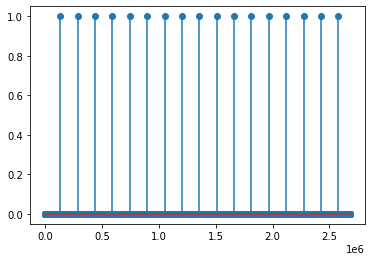

In [4]:
plt.stem(eclipse_signal[0,:])

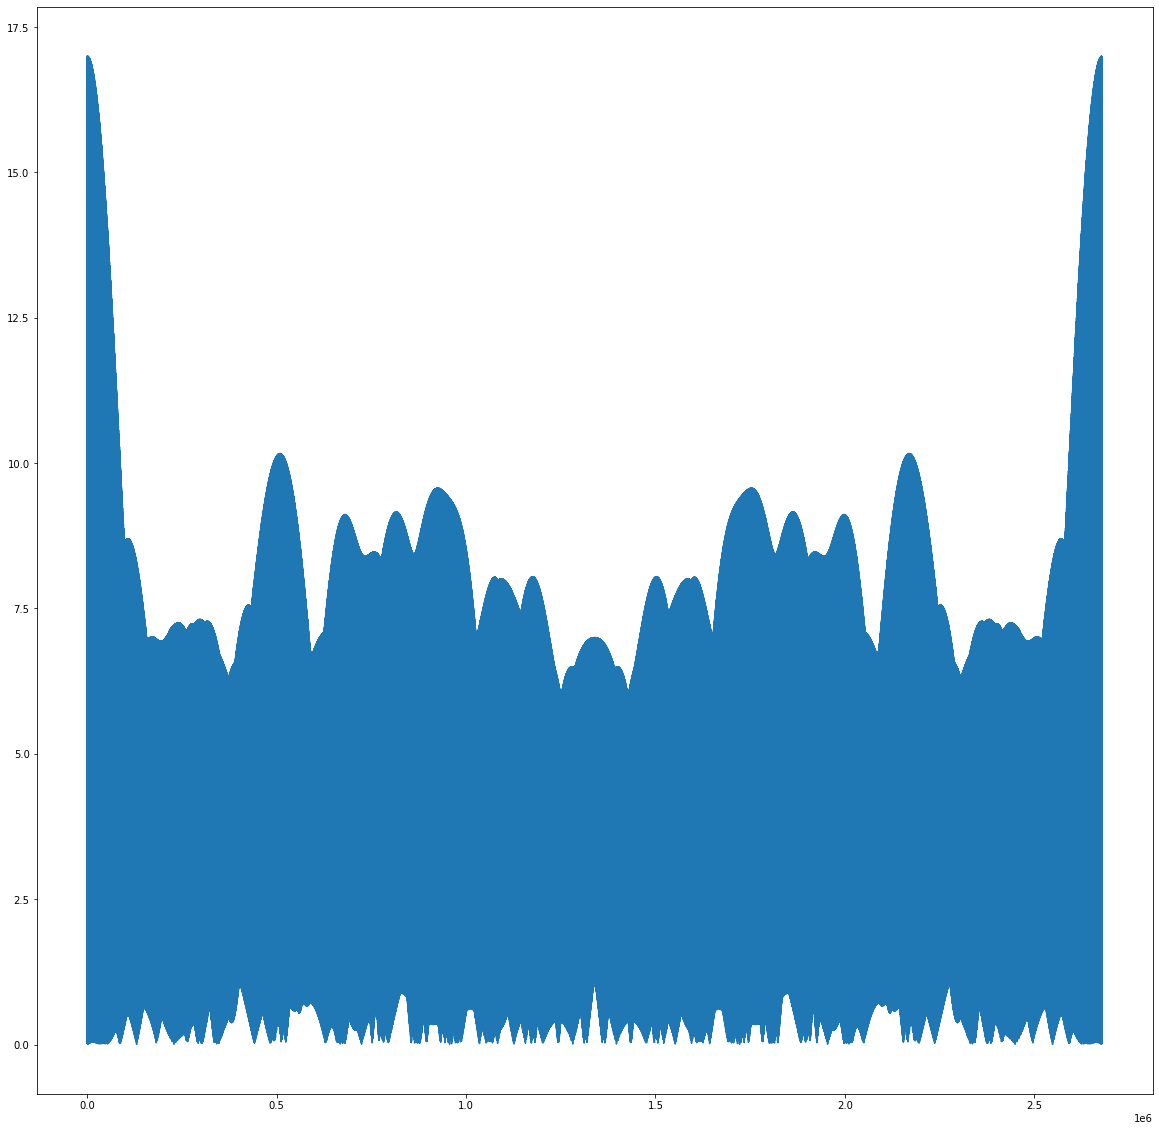

In [5]:
spectrum = fft(eclipse_signal)

plt.figure(figsize=(20,20))

plt.plot(np.abs(spectrum[0, 0:60*60*24*31]))

In [6]:
max_val = np.max(spectrum)

print(str(max_val) + " at : " + str(np.argmax(spectrum)))


print(spectrum[0,0:100])

print(np.argmax(spectrum[0, 10**6:13*10**5]))

(17-0j) at : 0
[ 1.70000000e+01-0.00000000e+00j -5.17378982e-01+1.95616047e-02j
 -5.22453160e-01+3.93450821e-02j -5.31145117e-01+6.00954786e-02j
 -5.43779876e-01+8.22583897e-02j -5.61046430e-01+1.06535776e-01j
 -5.83581742e-01+1.33706369e-01j -6.12667199e-01+1.64776193e-01j
 -6.50069620e-01+2.01360069e-01j -6.98607813e-01+2.44905579e-01j
 -7.61888927e-01+3.00032983e-01j -8.46947727e-01+3.70812232e-01j
 -9.65025013e-01+4.66482246e-01j -1.13780643e+00+6.03630704e-01j
 -1.41198907e+00+8.18332781e-01j -1.90705692e+00+1.20313786e+00j
 -3.06029148e+00+2.09526932e+00j -8.69452886e+00+6.45136018e+00j
  8.95294410e+00-7.17937786e+00j  2.82535747e+00-2.44274847e+00j
  1.63136931e+00-1.52102615e+00j  1.12328709e+00-1.12884351e+00j
  8.42097248e-01-9.12383515e-01j  6.63047140e-01-7.74862226e-01j
  5.39122420e-01-6.79889718e-01j  4.47816733e-01-6.10389676e-01j
  3.78055219e-01-5.56358608e-01j  3.20117777e-01-5.14187676e-01j
  2.73351625e-01-4.77648802e-01j  2.32740528e-01-4.44767936e-01j
  1.964906

In [7]:
eclipse_signal = np.zeros([1 , 60*60*24*31])

base_epoch = Epoch()
base_epoch.set(2020, 1, 1, 0)

print(np.shape(eclipse_signal))

for tmng in calc.all_timings_sorted:

    if((tmng.row == 0) & (tmng.phenomenom.phenomenom_type == 'EC') & (tmng.appereance_type == 'start') \
       & (tmng.phenomenom.shadow_type == 'EXT')):

        print(tmng.epoch.get_full_date(), tmng.row, tmng.phenomenom.phenomenom_type, tmng.appereance_type,
              tmng.phenomenom.shadow_type)
        
        time_bin = np.round((tmng.epoch.jde()-base_epoch.jde()))
        
        print(time_bin.astype(int))
        
        eclipse_signal[0,time_bin.astype(int)] = 1

(1, 2678400)
(2020, 1, 2, 12, 38, 1.592009961605072) 0 EC start EXT
2
(2020, 1, 2, 12, 38, 1.592009961605072) 0 EC start EXT
2
(2020, 1, 4, 7, 6, 39.476636946201324) 0 EC start EXT
3
(2020, 1, 4, 7, 6, 39.476636946201324) 0 EC start EXT
3
(2020, 1, 6, 1, 35, 13.51010799407959) 0 EC start EXT
5
(2020, 1, 6, 1, 35, 13.51010799407959) 0 EC start EXT
5
(2020, 1, 7, 20, 3, 52.48288035392761) 0 EC start EXT
7
(2020, 1, 7, 20, 3, 52.48288035392761) 0 EC start EXT
7
(2020, 1, 9, 14, 32, 24.971077144145966) 0 EC start EXT
9
(2020, 1, 9, 14, 32, 24.971077144145966) 0 EC start EXT
9
(2020, 1, 11, 9, 1, 1.5230217576026917) 0 EC start EXT
10
(2020, 1, 11, 9, 1, 1.5230217576026917) 0 EC start EXT
10
(2020, 1, 13, 3, 29, 34.23008680343628) 0 EC start EXT
12
(2020, 1, 13, 3, 29, 34.23008680343628) 0 EC start EXT
12
(2020, 1, 14, 21, 58, 11.003313660621643) 0 EC start EXT
14
(2020, 1, 14, 21, 58, 11.003313660621643) 0 EC start EXT
14
(2020, 1, 16, 16, 26, 41.29695385694504) 0 EC start EXT
16
(2020, 1, 

/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


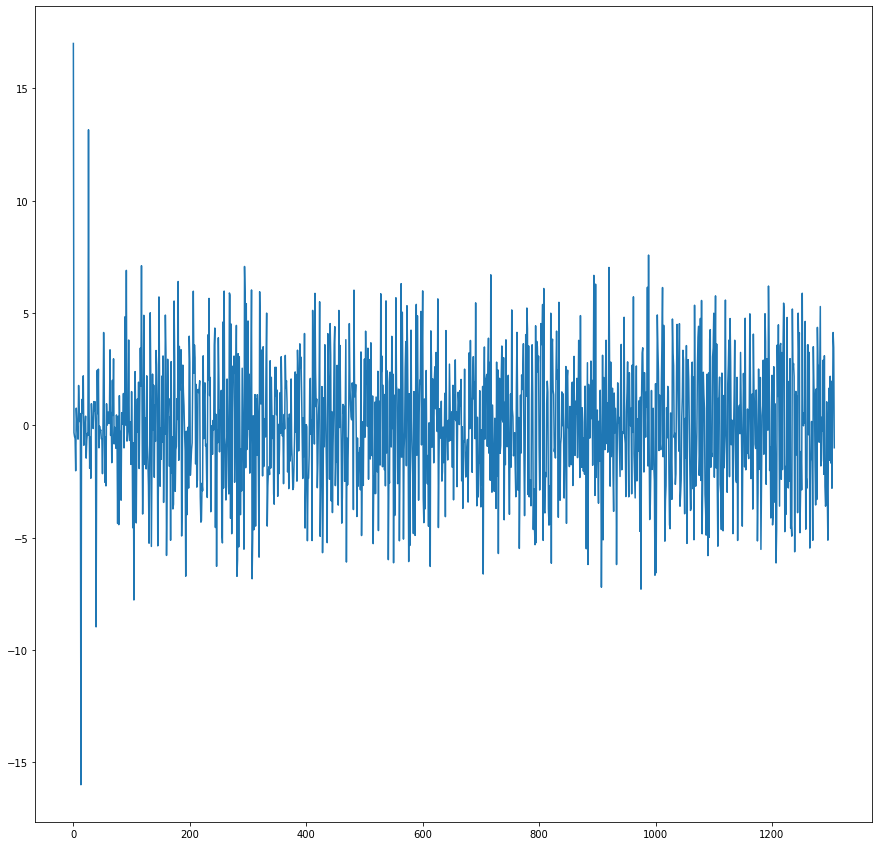

In [7]:
spectrum = fft(eclipse_signal)

plt.figure(figsize=(15,15))

plt.plot(spectrum[0, 0:30*60*24*31:2**10])

/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


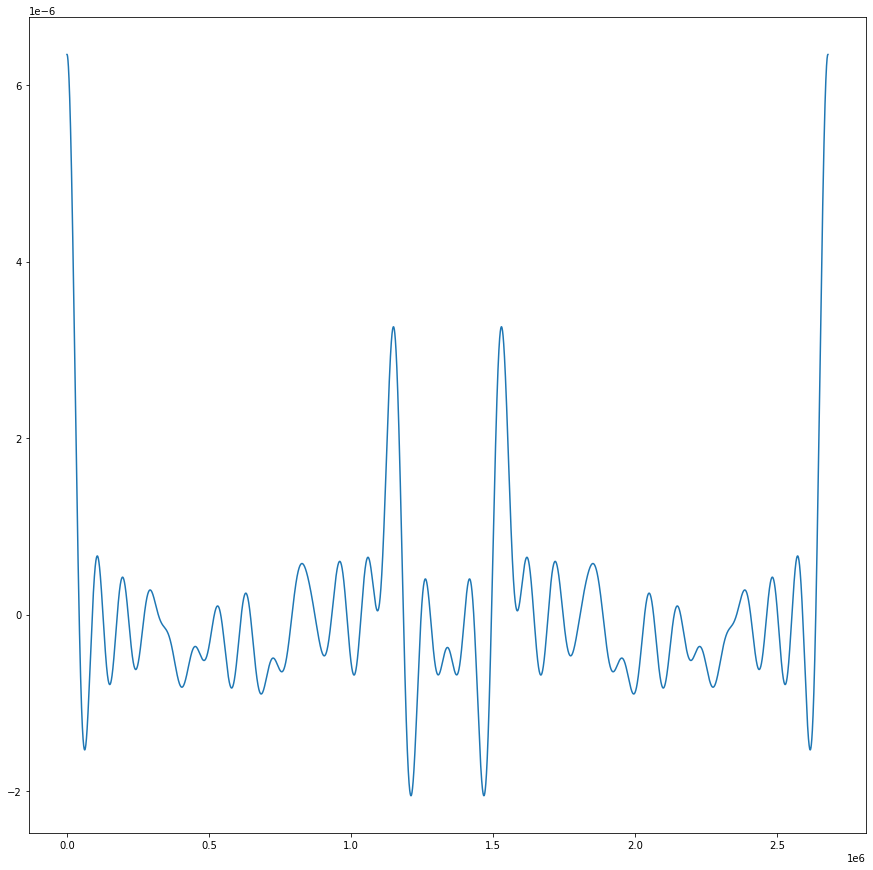

In [9]:
eclipse_image_plane = ifft(eclipse_signal[0,:])

plt.figure(figsize=(15,15))

plt.plot(eclipse_image_plane)

In [10]:
spectrum_undersampled = spectrum[0, 0:30*60*24*31:2**10]

period = np.argmax(eclipse_image_plane[10**6:14*10**5])

period_days = period * s_jd

print("Maximum detected at : " + str(period_days) + " with val " + str(np.max(eclipse_image_plane[10**6:14*10**5])))

Maximum detected at : 1.7261364706791937 with val (3.261232954694244e-06+5.976306281903971e-07j)


/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

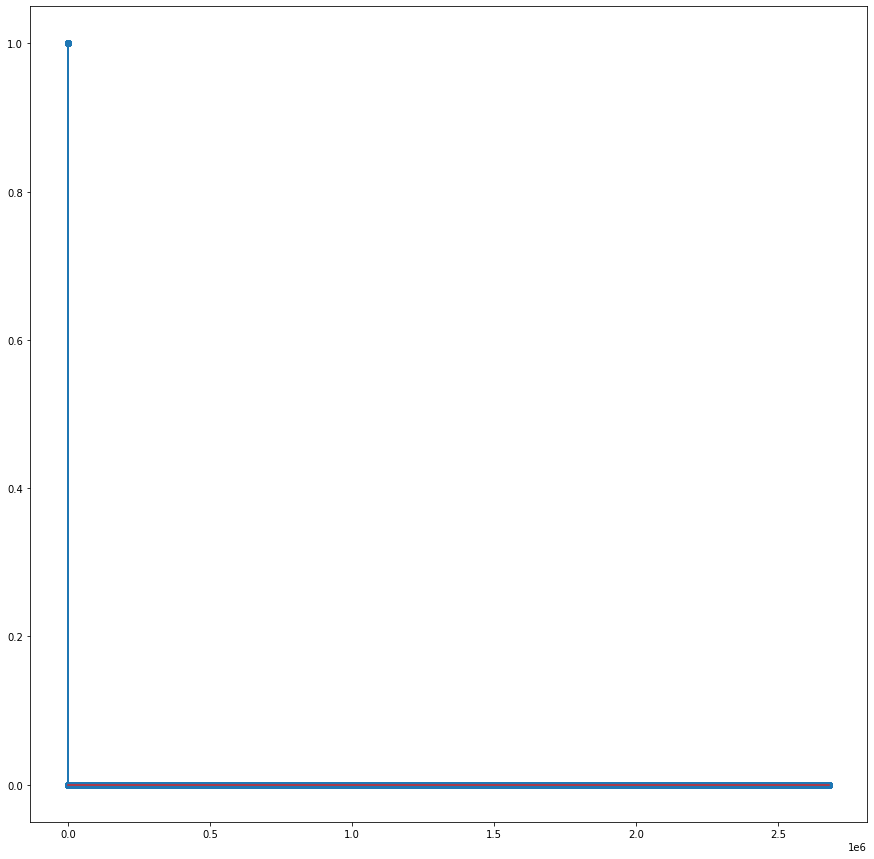

In [11]:
eclipse_ifft = ifft(spectrum)

plt.figure(figsize=(15,15))

plt.stem(eclipse_ifft[0, :])

/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

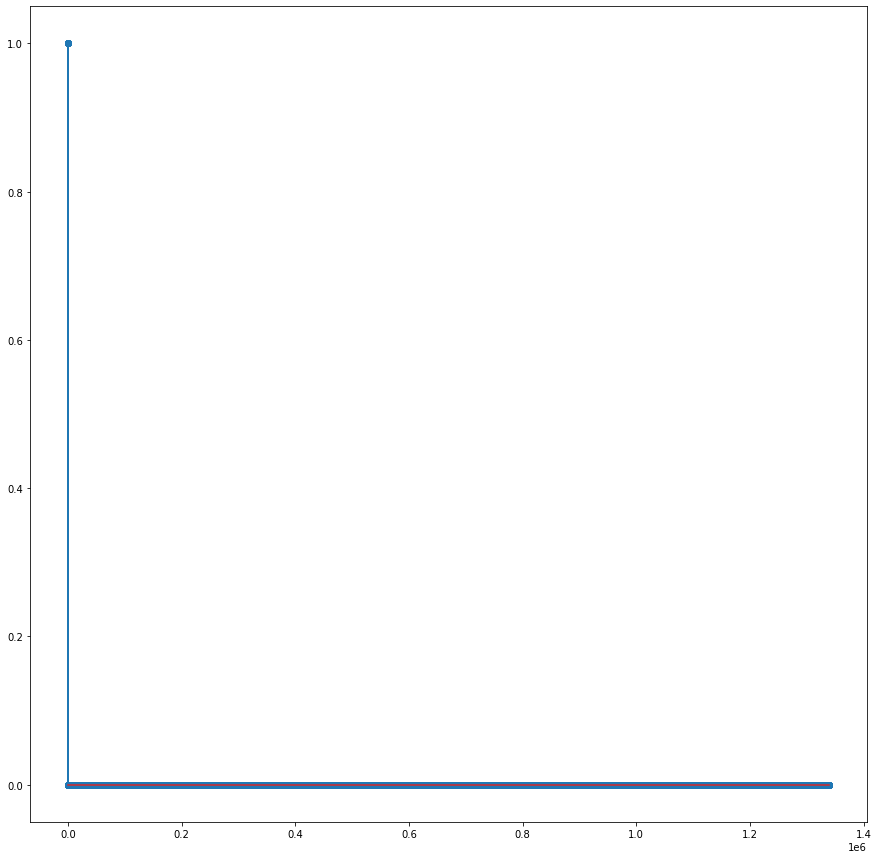

In [12]:
eclipse_undersample = ifft(spectrum[0, 0:30*60*24*31])

plt.figure(figsize=(15,15))

plt.stem(eclipse_undersample)

In [13]:
np.max(eclipse_image_plane[10**6:14*10**5])


(3.261232954694244e-06+5.976306281903971e-07j)

In [14]:
period = np.argmax(eclipse_image_plane[10**6:14*10**5])

print("Value in seconds : " + str(period))

period_days = period * s_jd

print("Maximum detected at : " + str(period_days))

Value in seconds : 149139
Maximum detected at : 1.7261364706791937


/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


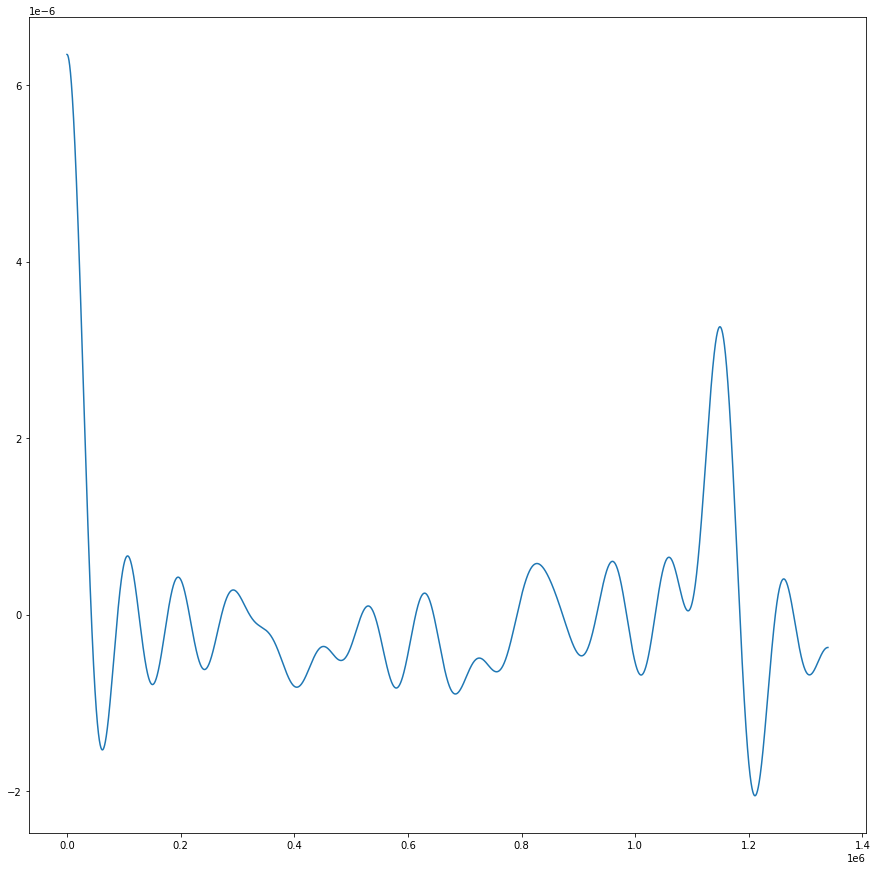

In [15]:
eclipse_image_plane = ifft(eclipse_signal[0,:])

plt.figure(figsize=(15,15))

plt.plot(eclipse_image_plane[0:30*60*24*31])

In [16]:
from pylab import *
import scipy.signal as signal

In [17]:
n = 1001
a = signal.firwin(n, cutoff = [1/160000, 1/140000], window = 'blackmanharris', pass_zero = False)
print(a)

[1.67239514e-07 1.68796205e-07 1.73468000e-07 ... 1.73468000e-07
 1.68796205e-07 1.67239514e-07]


In [18]:
w, h = signal.freqz(a, worN = 2**9)
print(np.size(w))

512


Text(0.5, 0, 'Frequency [rad/sample]')

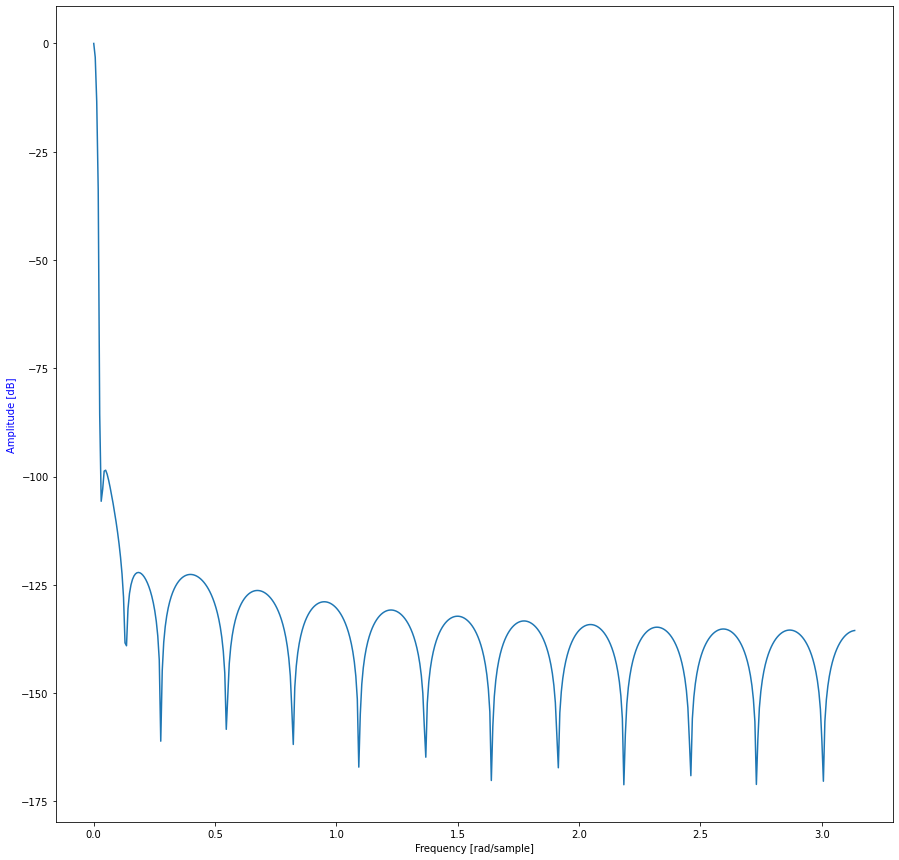

In [19]:
plt.figure(figsize=(15,15))
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

/home/vserra/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


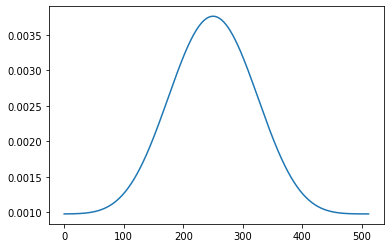

In [20]:
impulse_answer = ifft(h)
plt.plot(impulse_answer[0:10**3])